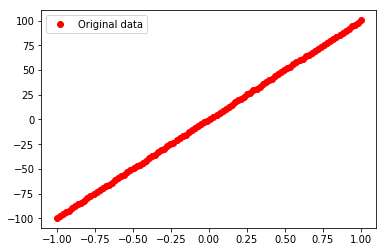

Epoch: 1 loss= 1381.3369 W= [43.18272] b= [16.874506]
Epoch: 11 loss= 0.07913067 W= [99.91663] b= [0.03060118]
Epoch: 21 loss= 0.077547215 W= [99.98477] b= [0.00445172]
Epoch: 31 loss= 0.077547505 W= [99.98481] b= [0.004437]
Epoch: 41 loss= 0.077547476 W= [99.98481] b= [0.00443696]
Epoch: 51 loss= 0.077547505 W= [99.98481] b= [0.004437]
Epoch: 61 loss= 0.077547476 W= [99.98481] b= [0.00443696]
Epoch: 71 loss= 0.077547505 W= [99.98481] b= [0.004437]
Epoch: 81 loss= 0.077547476 W= [99.98481] b= [0.00443696]
Epoch: 91 loss= 0.077547505 W= [99.98481] b= [0.004437]
Model training Fnished
cost= 0.077547505 W= [99.98481] b= [0.00443702]


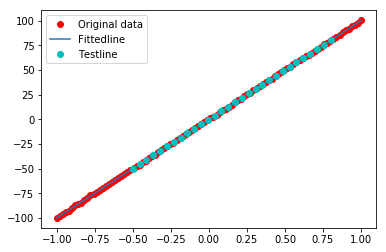

plotdata[avgloss]: [1381.3369, 0.07913067, 0.077547215, 0.077547505, 0.077547476, 0.077547505, 0.077547476, 0.077547505, 0.077547476, 0.077547505]


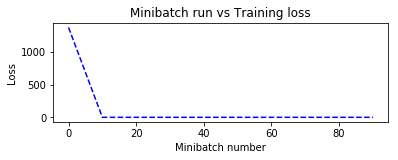

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx,val in enumerate(a)]
plotdata = {'batchsize':[],'loss':[]}
train_X = np.linspace(-1,1,100)#x轴数据点
test_X = np.linspace(-0.5,0.8,30)#生成测试数据
train_Y = 100 * train_X + np.random.randn(train_X.shape[0])*0.3#这个数据必须是由一定误差的，不然就过拟合了，没有意义了
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

#搭建模型
inputdict = {
    'x':tf.placeholder('float'),
    'y':tf.placeholder('float')
}
#模型参数
W = tf.Variable(tf.random_normal([1]),name='Weight')#随机生成-1 1之间的正太分布的值
b = tf.Variable(tf.zeros([1]),name='Bias')
z = tf.multiply(inputdict['x'],W) + b
cost = tf.reduce_mean(tf.square(inputdict['y']-z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()
training_epochs = train_X.size
display_step = 10
saver = tf.train.Saver()
saverdir = r'E:\jupyter_pythonfiles\tensorflow\model_dir'
model_file = saverdir + 'linermodel'
isTrain = True#是不是训练，是训练的刷就走原来的代码，并在最后保存，如果不是那么就把保存的模型打印出来一些信息
#启动session会话
with tf.Session() as sess:
    sess.run(init)
    #想模型输入数据
    if isTrain:
        for epoch in range(training_epochs):
            for (x,y) in zip(train_X,train_Y):
                sess.run(optimizer,feed_dict={inputdict['x']:x,inputdict['y']:y})
            #显示训练的详细信息
            if epoch % display_step == 0:
                loss = sess.run(cost,feed_dict={inputdict['x']:train_X,inputdict['y']:train_Y})
                print('Epoch:',epoch + 1,'loss=',loss,'W=',sess.run(W),'b=',sess.run(b))
                if not (loss == 'NA'):
                    plotdata['batchsize'].append(epoch)
                    plotdata['loss'].append(loss)
        print('Model training Fnished')
        saver.save(sess,model_file)
    else:
        saver.restore(sess,model_file)
        print_tensors_in_checkpoint_file(model_file,None,True)
    print('cost=',sess.run(cost,feed_dict={inputdict['x']:train_X,inputdict['y']:train_Y}),'W=',sess.run(W),'b=',sess.run(b))
#x训练图可视化
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X + sess.run(b),label='Fittedline')
    #测试数据显示
    plt.plot(test_X,sess.run(W)*test_X + sess.run(b),'co',label='Testline')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    print('plotdata[avgloss]:',plotdata['avgloss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batchsize'],plotdata['avgloss'],'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs Training loss')
    plt.show()